In [25]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [26]:
#Read in data
happy16=pd.DataFrame(pd.read_csv('CSVs/Happiness_2016.csv'))
airpoll=pd.DataFrame(pd.read_csv('CSVs/air-pollution per country per year.csv'))
airpoll.head()

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)"
0,Afghanistan,AFG,1990,60.936690
1,Afghanistan,AFG,1995,56.136628
2,Afghanistan,AFG,2000,56.092028
3,Afghanistan,AFG,2005,43.234032
4,Afghanistan,AFG,2010,46.536809


In [27]:
#Limit air pollution data to 2016
airpoll=airpoll[airpoll['Year']==2016]
airpoll.head()

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)"
10,Afghanistan,AFG,2016,62.854857
21,Albania,ALB,2016,14.634008
32,Algeria,DZA,2016,37.230956
43,American Samoa,ASM,2016,3.763412
54,Andorra,AND,2016,10.879472


In [28]:
#Narrow down and rename columns
airpoll16=pd.DataFrame(airpoll[['Entity', 'Code',
                 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)']])
airpoll16=airpoll16.rename(columns={'Entity':'Country', 
                                'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)':'Air Pollution (ug/m3)'})
airpoll16.head()

,Country,Code,Air Pollution (ug/m3)
10,Afghanistan,AFG,62.854857
21,Albania,ALB,14.634008
32,Algeria,DZA,37.230956
43,American Samoa,ASM,3.763412
54,Andorra,AND,10.879472


In [29]:
#Narrow down and rename columns
country_happy16=happy16[['Country','Happiness Score']]
country_happy16=country_happy16.rename(columns={'Happiness Score':'2016 Happiness Score'})
country_happy16.head()

,Country,2016 Happiness Score
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [30]:
#Read in file with country codes, merge with 2016 happiness data
happy19=pd.read_csv('csvs/country_iso.csv')
happy19=happy19.drop(['Unnamed: 0'], axis=1)
happy = pd.merge(happy19, country_happy16, on='Country', how='inner')
happy = happy.rename(columns={'iso_a3':'Code'})
happy.head()

,Country,Happiness score,Code,2016 Happiness Score
0,Finland,7.769,FIN,7.413
1,Denmark,7.600,DNK,7.526
2,Norway,7.554,NOR,7.498
3,Iceland,7.494,ISL,7.501
4,Netherlands,7.488,NLD,7.339


In [31]:
#Merge happiness and air pollution data
happy_airpoll16 = pd.merge(happy, airpoll16, on='Code', how='inner')
happy_airpoll16.head()

,Country_x,Happiness score,Code,2016 Happiness Score,Country_y,Air Pollution (ug/m3)
0,Finland,7.769,FIN,7.413,Finland,6.234267
1,Denmark,7.600,DNK,7.526,Denmark,10.328744
2,Norway,7.554,NOR,7.498,Norway,7.874068
3,Iceland,7.494,ISL,7.501,Iceland,7.298390
4,Netherlands,7.488,NLD,7.339,Netherlands,15.230050


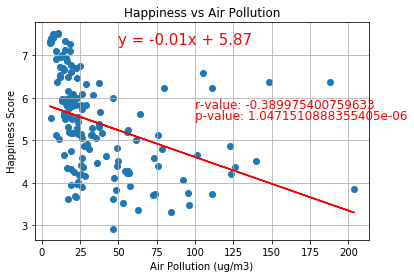

R-value: -0.389975400759633, P-value: 1.0471510888355405e-06


In [32]:
#Linear Regression
y_values=happy_airpoll16['2016 Happiness Score']
x_values=happy_airpoll16['Air Pollution (ug/m3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Air Pollution')
plt.xlabel('Air Pollution (ug/m3)')
plt.ylabel('Happiness Score')
plt.annotate(line_eq,(50,7.25),fontsize=15,color="red")
plt.annotate(r_value,(100,5.75),fontsize=12,color="red")
plt.annotate(p_value,(100,5.5),fontsize=12,color="red")
plt.grid()
plt.savefig("Images/air_pollution.png")
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [33]:
#import dataset with geographic info to plot chorograph
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, happy_airpoll16, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Country_x,Happiness score,2016 Happiness Score,Country_y,Air Pollution (ug/m3)
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.231,3.666,Tanzania,22.349307
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.278,7.404,Canada,7.525224
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,6.892,7.104,United States,9.196934
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,5.809,5.919,Kazakhstan,19.655904
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,6.174,5.987,Uzbekistan,46.691076


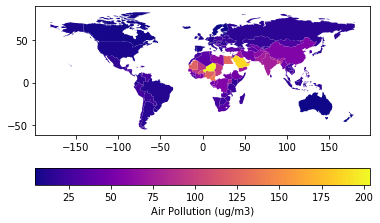

In [39]:
#Chorograph of Air Pollution
fig, ax = plt.subplots(1,1)
world.plot(column='Air Pollution (ug/m3)', ax=ax, legend=True, cmap='plasma',
           legend_kwds={'label': "Air Pollution (ug/m3)",'orientation': "horizontal"})
plt.savefig('Images/air_pollution_map 2017.png')